[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [1]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1+ --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

update-alternatives: error: alternative path /usr/bin/python3.8 doesn't exist
update-alternatives: error: alternative path /usr/bin/python3.9 doesn't exist
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib python3.8 python3.8-minimal
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,076 kB of archives.
After this operation, 18.8 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minimal amd64 3.8.20-1+jammy1 [2,023 kB]
Get:3 https://ppa.launchpadcontent.net

Download models (1 mins)

In [3]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

  Using cached facexlib-0.3.0-py3-none-any.whl (59 kB)
  Using cached gfpgan-1.3.8-py3-none-any.whl (52 kB)
  Using cached basicsr-1.4.2.tar.gz (172 kB)
  Preparing metadata (setup.py) ... done
  Using cached filterpy-1.4.5.zip (177 kB)
  Preparing metadata (setup.py) ... done
  Using cached tb_nightly-2.14.0a20230808-py3-none-any.whl (5.5 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for basicsr
  Running setup.py clean for basicsr
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for filterpy
  Running setup.py clean for filterpy
Failed to build basicsr 

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

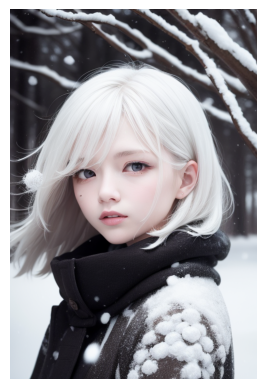

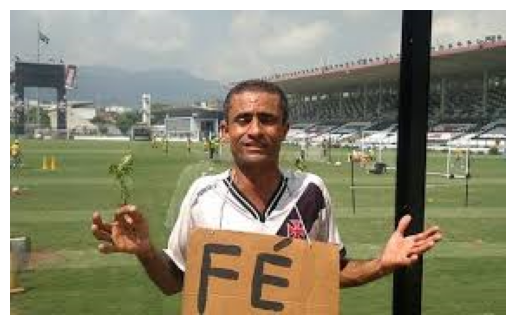

In [15]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples/source_image', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/source_image/{}.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

Animation

In [11]:
!python3.8 -m pip install --upgrade pip setuptools wheel
!python3.8 -m pip install facexlib --no-deps  # Tenta instalar sem dependências conflitantes
!python3.8 -m pip install filterpy==1.4.5  # Versão específica que costuma funcionar
!python3.8 -m pip install gfpgan==1.3.8  # Versão estável compatível

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.1 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214819 sha256=25028795c5299057d008b520ae2a59ead85a6f541131aeace4502498c5efbe8f
  Stored in directory: /root/.cache/pip/wheels/4d/d3/95/e17d0bcdd7dcfb0dbf79db006711e434c42036efbf6695ef7f
Successfully built basicsr


In [ ]:
# selected audio from exmaple/driven_audio
img = 'examples/source_image/{}.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./examples/driven_audio/xandao.wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

examples/source_image/vascaino.png
using safetensor as default
3DMM Extraction for source image
landmark Det:: 100% 1/1 [00:03<00:00,  3.92s/it]
3DMM Extraction In Video:: 100% 1/1 [00:00<00:00,  4.58it/s]
mel:: 100% 238/238 [00:00<00:00, 21807.16it/s]
audio2exp:: 100% 24/24 [00:01<00:00, 13.45it/s]
Face Renderer::  24% 29/119 [26:30<1:21:52, 54.58s/it]

In [ ]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))
